Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from pathlib import Path

In [2]:
from grader import Grader

In [3]:
# DATA_FOLDER = '../readonly/final_project_data/'
# data_folder = Path('data/competitive-data-science-final-project')
data_folder = Path('../readonly/final_project_data')

transactions    = pd.read_csv(data_folder/'sales_train.csv.gz')
items           = pd.read_csv(data_folder/'items.csv')
item_categories = pd.read_csv(data_folder/'item_categories.csv')
shops           = pd.read_csv(data_folder/'shops.csv')

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
# YOUR CODE GOES HERE

print('Transactions shape:', transactions.shape, f'Head\n{transactions.head()}\n')
print('items shape:', items.shape, f'\n{items.head().to_string()}\n')
print('item_categories shape:', item_categories.shape, f'\n{item_categories.head().to_string()}\n')
print('shops shape:', shops.shape, f'\n{shops.head().to_string()}\n')

Transactions shape: (2935849, 6) Head
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

items shape: (22170, 3) 
                                                              item_name  item_id  item_category_id
0                             ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]        1                76
2                         ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2                40
3                       ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3                

# Question 1

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [6]:
# YOUR CODE GOES HERE

In [7]:
transactions.date = pd.to_datetime(transactions.date, yearfirst=True)
sep14 = (transactions.date.dt.month==9)&(transactions.date.dt.year==2014)
tr_sep14 = transactions[sep14].copy()
tr_sep14['income'] = tr_sep14['item_price'] * tr_sep14['item_cnt_day']
# tr_sep14 = tr_sep14.merge(shops)
tr_sep14

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income
1267571,2014-09-01,12,54,10300,699.0,1.0,699.0
1267595,2014-09-01,12,54,10292,99.0,1.0,99.0
1267605,2014-09-01,12,54,10376,399.0,1.0,399.0
1267800,2014-09-01,12,54,11305,499.0,-1.0,-499.0
1267862,2014-09-01,12,54,10457,149.0,1.0,149.0
...,...,...,...,...,...,...,...
2323138,2014-09-12,23,25,6436,1399.0,1.0,1399.0
2323178,2014-09-12,23,25,6737,199.0,1.0,199.0
2323210,2014-09-12,23,25,6504,2499.0,1.0,2499.0
2323229,2014-09-12,23,25,6680,899.0,1.0,899.0


In [8]:
grouped_sum = tr_sep14.groupby('shop_id')['income'].sum().to_frame()
grouped_sum.sort_values('income', ascending=False, inplace=True)
grouped_sum.reset_index(inplace=True)
grouped_sum = grouped_sum.merge(shops)
grouped_sum.head()

,shop_id,income,shop_name
0,31,7.785688e+06,"Москва ТЦ ""Семеновский"""
1,25,6.784135e+06,"Москва ТРК ""Атриум"""
2,12,5.613298e+06,Интернет-магазин ЧС
3,28,5.315984e+06,"Москва ТЦ ""МЕГА Теплый Стан"" II"
4,54,5.162894e+06,"Химки ТЦ ""Мега"""


In [9]:
print(f'Максимальное значение {grouped_sum.iloc[0,1]:.2f} для ТЦ {grouped_sum.iloc[0,2]}')

Максимальное значение 7785688.00 для ТЦ Москва ТЦ "Семеновский"


In [10]:
round(grouped_sum.iloc[0,1], 2)

7785688.0

In [11]:
max_revenue = round(grouped_sum.iloc[0,1], 2)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7785688.0


# Question 2

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [12]:
# YOUR CODE GOES HERE

In [13]:
sum14 = (transactions.date.dt.month.isin([6, 7, 8]))&(transactions.date.dt.year==2014)
tr_sum14 = transactions[sum14].copy()
tr_sum14['income'] = tr_sum14['item_price'] * tr_sum14['item_cnt_day']
tr_sum14 = tr_sum14.merge(items)
tr_sum14.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_name,item_category_id
0,2014-08-01,12,54,10298,399.0,2.0,798.0,ГАДКИЙ Я 2,40
1,2014-07-01,12,54,10298,399.0,3.0,1197.0,ГАДКИЙ Я 2,40
2,2014-07-01,12,51,10298,265.0,1.0,265.0,ГАДКИЙ Я 2,40
3,2014-08-01,12,58,10298,399.0,1.0,399.0,ГАДКИЙ Я 2,40
4,2014-07-01,12,56,10298,399.0,1.0,399.0,ГАДКИЙ Я 2,40


In [14]:
gr_sum14 = tr_sum14.groupby('item_category_id')['income'].sum().to_frame().reset_index()
gr_sum14 = gr_sum14.merge(item_categories).sort_values('income', ascending=False)
gr_sum14.head()

,item_category_id,income,item_category_name
9,12,38620818.10,Игровые консоли - PS4
16,20,34222996.89,Игры - PS4
15,19,27729089.93,Игры - PS3
19,23,21321897.92,Игры - XBOX 360
24,30,17211400.35,Игры PC - Стандартные издания


In [15]:
print(f'Максимальный Revenue={gr_sum14.iloc[0,1]} для категории "{gr_sum14.iloc[0,2]}" с id={gr_sum14.iloc[0,0]}')

Максимальный Revenue=38620818.1 для категории "Игровые консоли - PS4" с id=12


In [16]:
category_id_with_max_revenue = gr_sum14.iloc[0,0] # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 12


# Question 3

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [17]:
# YOUR CODE GOES HERE

In [18]:
tr_gr_item = transactions.groupby('item_id')['item_price'].agg(min=np.min, max=np.max, mean=np.mean)
tr_gr_item

,min,max,mean
item_id,,,
0,58.0,58.0,58.000000
1,4490.0,4490.0,4490.000000
2,58.0,58.0,58.000000
3,58.0,100.0,79.000000
4,58.0,58.0,58.000000
...,...,...,...
22165,59.0,59.0,59.000000
22166,150.0,150.0,150.000000
22167,155.0,299.0,297.686490


In [19]:
# количестов элементов где минимальная и максимальная цены равны
tr_gr_item[tr_gr_item['min']==tr_gr_item['max']].count()[0]

5926

In [20]:
tr_group = transactions.groupby('item_id')['item_price']
tr_group_condition = tr_group.agg(np.argmin) == tr_group.agg(np.argmax)
tr_group_condition_frame = tr_group_condition.to_frame()
tr_group_condition_frame

,item_price
item_id,
0,True
1,True
2,True
3,False
4,True
...,...
22165,True
22166,True
22167,False


In [21]:
q3_result = tr_group_condition_frame[tr_group_condition_frame['item_price']==True].count()
q3_result

item_price    5926
dtype: int64

In [22]:
num_items_constant_price = q3_result # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: item_price    5926
dtype: int64


Remember, the data can sometimes be noisy.

# Question 4

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [23]:
shop_id = 25

In [24]:
s25dec14 = (transactions.date.dt.month==12)&(transactions.date.dt.year==2014)&(transactions.shop_id==25)
tr_s52dec14 = transactions[s25dec14].copy()
tr_s52dec14.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [25]:
q4_df = tr_s52dec14.groupby(pd.Grouper(key='date', freq='D'))['item_cnt_day'].count().to_frame().reset_index()
print(q4_df.head())
print('Shape:', q4_df.shape)
q4_df.describe()

        date  item_cnt_day
0 2014-12-01           179
1 2014-12-02           168
2 2014-12-03           178
3 2014-12-04           245
4 2014-12-05            83
Shape: (31, 2)


,item_cnt_day
count,31.000000
mean,277.677419
std,185.169722
min,0.000000
25%,178.500000
50%,234.000000
75%,324.500000
max,1022.000000


In [26]:
q4_df['item_cnt_day'].sum()

8608

In [27]:
q4_df['item_cnt_day'].values, q4_df['date'].values

(array([ 179,  168,  178,  245,   83,  186,  194,  132,  149,  182,  126,
         231,  315,  246,  181,  151,  229,  234,  315,  399,  294,  239,
         293,  334,  376,  422,  542,  446,    0, 1022,  517]),
 array(['2014-12-01T00:00:00.000000000', '2014-12-02T00:00:00.000000000',
        '2014-12-03T00:00:00.000000000', '2014-12-04T00:00:00.000000000',
        '2014-12-05T00:00:00.000000000', '2014-12-06T00:00:00.000000000',
        '2014-12-07T00:00:00.000000000', '2014-12-08T00:00:00.000000000',
        '2014-12-09T00:00:00.000000000', '2014-12-10T00:00:00.000000000',
        '2014-12-11T00:00:00.000000000', '2014-12-12T00:00:00.000000000',
        '2014-12-13T00:00:00.000000000', '2014-12-14T00:00:00.000000000',
        '2014-12-15T00:00:00.000000000', '2014-12-16T00:00:00.000000000',
        '2014-12-17T00:00:00.000000000', '2014-12-18T00:00:00.000000000',
        '2014-12-19T00:00:00.000000000', '2014-12-20T00:00:00.000000000',
        '2014-12-21T00:00:00.000000000', '2014-1

In [28]:
# Удаляю строки с нулевыми продажами
print('Удаляю строк:', q4_df[q4_df['item_cnt_day']==0]['item_cnt_day'].count())
q4_df.drop(index=q4_df[q4_df['item_cnt_day']==0].index, inplace=True)

Удаляю строк: 1


In [29]:
q4_df[q4_df['item_cnt_day']==0]['item_cnt_day'].count()

0

In [30]:
q4_df['item_cnt_day'].var(ddof=1)

32722.754022988498

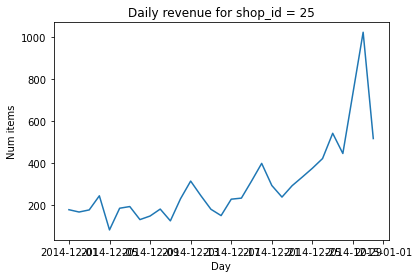

Current answer for task total_num_items_sold_var is: 32722.754022988498


In [31]:
total_num_items_sold = q4_df['item_cnt_day'].values # YOUR CODE GOES HERE
days = q4_df['date'].values # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = q4_df['item_cnt_day'].var(ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [32]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

SyntaxError: invalid syntax (<ipython-input-32-4abe722246ff>, line 1)

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)